# Notebook for preparing redesign of data management

### Python Libraries?

In [2]:
import pandas as pd
import numpy as np

from urllib.request import urlopen
import json

import time

import requests

In [49]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate

In [50]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

### Custom Modules

In [51]:
import data_processing
import plotting

# Extension to auto reload custom modules
%load_ext autoreload

%autoreload 1

%aimport data_processing
%aimport plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
# Get county geojson
COVID_GEOJSON = data_processing.load_county_geojson()

# Get state data
COVID_STATES_DF = data_processing.get_covid_state_data()

# Get county data
COVID_COUNTIES_DF = data_processing.get_covid_county_data()

Pulling geojson from file.
Pulling state data from Covid Tracking API
Retrieving Covid County data
Pulling county data from github.


In [88]:
COVID_STATES_DF = data_processing.get_covid_state_data()

Pulling state data from Covid Tracking API


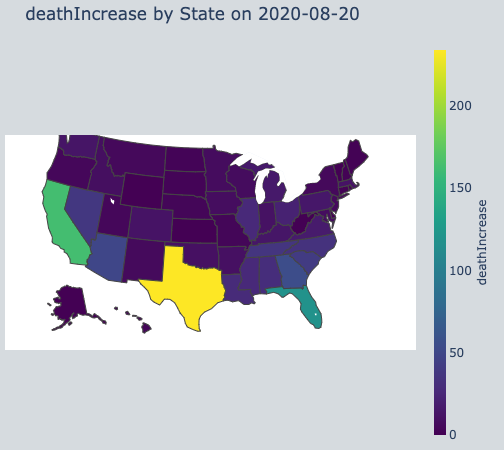

In [89]:
plotting.plot_choropleth_state(COVID_STATES_DF, '2020-08-20', 'deathIncrease')

## Data Importing

### County GeoJson for polygons on choropleth

In [ ]:
# Get the Map of US counties
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    county_geojson = json.load(response)

In [ ]:
with open('data/county_geojson.json','w') as fout:
    json.dump(county_geojson,fout)

In [ ]:
with open('data/county_geojson.json','r') as fout:
    county_geojson = json.load(fout)

### County Data
This is where we import data from [New York Times GitHub page](https://github.com/nytimes/covid-19-data) to get county level coronavirus data.



### Using data_processing

In [ ]:
COVID_COUNTIES_DF = data_processing.get_covid_county_data()

In [ ]:
date_dict = data_processing.generate_slider_dates(COVID_COUNTIES_DF)

In [ ]:
time.strftime('%Y-%m-%d',time.localtime(max(date_dict)))

In [ ]:
COVID_COUNTIES_DF['date'].max()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

### Get State Data

In [8]:
COVID_STATES_DF = data_processing.get_covid_state_data()

Pulling state data from file.


In [45]:
STATE_MASK = (COVID_STATES_DF['state'] == 'CO')
DATE_MASK = ((COVID_STATES_DF['date'] >= '2020-05-10') & (COVID_STATES_DF['date'] <= '2020-05-20'))
NEGATIVE_DEATH = (COVID_STATES_DF['deathIncrease']<0)

In [44]:
COVID_STATES_DF[STATE_MASK & DATE_MASK][['date','death','state','deathIncrease']].head(15)

,date,death,state,deathIncrease
5606,2020-05-20,968.0,CO,47
5662,2020-05-19,921.0,CO,43
5718,2020-05-18,878.0,CO,0
5774,2020-05-17,878.0,CO,0
5830,2020-05-16,878.0,CO,-213
5886,2020-05-15,1091.0,CO,29
5942,2020-05-14,1062.0,CO,53
5998,2020-05-13,1009.0,CO,22
6054,2020-05-12,987.0,CO,6
6110,2020-05-11,981.0,CO,14


In [47]:
COVID_STATES_DF[NEGATIVE_DEATH][['date','death','state','deathIncrease']].head(200)

,date,death,state,deathIncrease
177,2020-08-25,603.0,DE,-1
674,2020-08-16,599.0,AR,-1
1088,2020-08-09,6519.0,MI,-1
1144,2020-08-08,6520.0,MI,-4
1367,2020-08-04,123.0,ME,-1
1458,2020-08-02,458.0,AR,-2
1796,2020-07-27,3304.0,AZ,-1
1900,2020-07-26,1494.0,WA,-1
1986,2020-07-24,1178.0,MO,-1
2266,2020-07-19,1129.0,MO,-1


In [25]:
COVID_STATES_DF[STATE_MASK & NEGATIVE_DEATH][['date','death','deathIncrease']].sort_values(by='date',ascending = True).head(20)

,date,death,deathIncrease


In [ ]:
COVID_STATES_DF.columns

In [ ]:
plotting.choropleth_state_deaths_density(COVID_STATES_DF,'death', '2020-08-26')

In [ ]:
COVID_STATES_DF.head()

In [ ]:
COVID_STATES_DF.head()

In [ ]:
state_stats.head()

In [ ]:
# Import the unemployment data because it has the fips codes
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df['prefix'] = [x[:2] for x in df['fips']]

In [ ]:
df.head()

In [ ]:
USA-states

In [ ]:

deaths = states_df.reset_index()
################################################################################
# Read in states data
states = pd.read_csv('./data/tbl_states.csv')

# Fix fips code to be a string, prefix 0 to single digit codes
states['fips'] = states['fips'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [ ]:
df.head()

In [ ]:
states.head()

In [ ]:
merged = pd.merge(df, states, left_on='prefix', right_on='fips', how='outer')

In [ ]:
merged.head()

In [ ]:
states_df.columns

In [ ]:
a = states_df[['state','death','deathIncrease','positive','fips']]

In [ ]:

merged = pd.merge(df, states, left_on='prefix', right_on='fips', how='outer')
    # Rename convention
merged.rename(columns={'fips_x': 'fips_co', 'fips_y':'fips_st'}, inplace=True)

max_date = max(deaths['date'])
deaths = deaths[deaths['date'] == max_date]

final = pd.merge(merged, deaths, how='outer')
final = final.drop(columns=['prefix'])

# Create a log scale of lived in density
final['logd'] = np.log(final['Lived'])

# create a column for death_per_m
x = final['death']*1000000 / final['Pop']
final['death_per_m'] = x.copy()

final['log_std_density'] = np.log(final['Standard'])

In [ ]:
states_df.columns

In [ ]:
final.columns

In [ ]:
final.columns

In [ ]:
final.head()

### Get Dates for Date Slider

In [ ]:
# Get today's datea
date = time.strftime('%Y-%m-%d')
# Set New York for state mask
state = 'New York'

# Only look at New York Dates
state_mask = (df['state'] == state)

# create today's date mask
date_mask = (df['date'] == date)

# Get min date from df
min_date = int(time.mktime(df['date'].min().timetuple()))

# Hardcode a start date
start_date = '2020-03-01'
start_date_int = int(time.mktime(datetime.datetime.strptime(start_date, '%Y-%m-%d').timetuple()))

# Get max date from df
max_date_int = int(time.mktime(df['date'].max().timetuple()))

# Create a list of dates from max to min, going back 2 weeks each time
date_list = range(max_date_int, start_date_int, -(14*24*60*60))
date_dict = {day:time.strftime('%Y-%m-%d',time.localtime(day))  for day in date_list}

### Using data_processing

In [ ]:
date_dict = data_processing.generate_slider_dates(df)

In [ ]:
date_dict

In [ ]:
# Get today's date
time.strftime('%Y-%m-%d', time.localtime())

In [ ]:
time.strftime('%Y-%m-%d')

# Dash Components

In [ ]:
date = '2020-08-26'
date_mask = (df['date'] == date)

In [ ]:
a = round(df[date_mask]['cases'].mean(),-1)

In [ ]:
round(a.mean(),-1)

In [ ]:
AB = pd.DataFrame(df.to_dict())

In [ ]:
AB

In [ ]:
dcc.Store(id='store', data = df)

# Plotly

In [ ]:
import plotly.graph_objects as go

In [ ]:
go.Figure()

In [ ]:
go.Choropleth()

In [ ]:
STATE_MASK = (COVID_STATES_DF['state'] == 'NY')
DATE_MASK = (COVID_STATES_DF['date']<='2020-04-26')

In [ ]:
COVID_STATES_DF[STATE_MASK & DATE_MASK].sort_values('date')['death'].diff()

In [ ]:
COVID_STATES_DF[['date','death','deathIncrease']][STATE_MASK & DATE_MASK]

In [ ]:
def scatter_deaths_states(covid_state_df,state):
    
    state_mask = (covid_state_df['state'] == state)
    covid_state_df[state_mask]

    fig = go.Figure()
    fig = make_subplots(specs=[[{"secondary_y":True}]])
    fig.update_layout(height=500,title_text="Daily and Total Deaths")
    fig.add_trace(go.Bar(x=covid_state_df[state_mask]['date'],
            y=covid_state_df[state_mask]['deathIncrease'], name="deathIncrease"), secondary_y=False,
        )
    fig.add_trace(
            go.Scatter(x=covid_state_df[state_mask]['date'],
                y=covid_state_df[state_mask]['death'], 
                name="Total"
            ),secondary_y=True
        )
    fig.update_yaxes(title_text="<b>Daily</b> Deaths", secondary_y=False)
    fig.update_yaxes(title_text="<b>Total</b> Deaths to Date", secondary_y=True)

    return fig

In [ ]:
a = tuple(('today','tomorrow'))

In [ ]:
type(a)

In [ ]:
b, c = a

In [ ]:
COVID_STATES_DF.columns

In [ ]:
COVID_STATES_DF['deathIncrease'].min()

In [ ]:
scatter_deaths_states(COVID_STATES_DF, 'CA')

# Animation frames

In [ ]:
COVID_STATES_DF

In [ ]:
import datetime

In [ ]:
range()

In [ ]:
COVID_STATES_DF = data_processing.get_covid_state_data()

In [ ]:
type(COVID_STATES_DF['date'][0])

In [ ]:
type(COVID_COUNTIES_DF['date'][0])

In [ ]:
a = COVID_STATES_DF['date'][0]

In [ ]:
a.strftime(format="%Y-%m-%d")

In [ ]:
animation_dates = COVID_STATES_DF[STATE_MASK]['date'].map(lambda x:x.strftime(format="%Y-%m-%d"))
animation_dates.sort_values(inplace=True)
animation_date_dict = {'date':list(animation_dates)}

In [ ]:
category_orders = {'date':list(COVID_STATES_DF[STATE_MASK]['date'].sort_values())}

In [ ]:
category_orders

In [ ]:
animation_dates = generate_animation_dates(COVID_STATES_DF)

In [ ]:
COVID_STATES_DF['date'].max()

In [ ]:
start_date = '2020-03-01'
max_date = COVID_STATES_DF['date'].max()

In [ ]:
range_index=pd.date_range(start=start_date, end=max_date, freq='W')
index = range_index.map(lambda x:x.strftime('%Y-%m-%d'))
animation_date_dict = {'date':list(index)}

In [ ]:
animation_date_dict

In [ ]:
pd.date_range(start=start_date,end=max_date)

In [ ]:
a.map(lambda x:x.strftime('%Y-%m-%d'))

In [ ]:
animation_date_dict

In [ ]:
range(start_date, max_date,1)

In [ ]:

def generate_animation_dates(df):
    
    # Hardcode a start date
    start_date = '2020-03-01'
    max_date = df['date'].max()
    

    # Create a list of dates from max to min, going back 2 weeks each time
    date_list = range(max_date_int, start_date_int, -(14*24*60*60))
    date_dict = {day:{'label':time.strftime('%Y-%m-%d',time.localtime(day)),'style':{'writing-mode': 'vertical-rl','text-orientation': 'sideways', 'height':'70px'}}  for day in date_list}
    return date_dict

In [ ]:
def plot_animation(df=COVID_STATES_DF, category='death'):
    fig = px.choropleth(data_frame=df,
                locations='state',
                color='death',
                locationmode='USA-states',
                animation_frame='date',
                category_orders=animation_date_dict)
    
    fig.update_geos(center = {"lat": 37.0902, "lon": -95.7129},
                    scope = 'usa')
    return fig

In [ ]:
fig = plot_animation()

In [ ]:
fig

In [ ]:
fig = px.choropleth(data_frame = fires_by_year, 
                  locations = fires_by_year['STATE'],
                  color = 'FIRE_COUNT',
                  range_color = [0,9000],
                  locationmode = 'USA-states',
                  animation_frame = 'FIRE_YEAR')

# Generate Aggregate Statistics

Here we will generate national statistics for select dates

In [ ]:
COVID_STATES_DF

In [ ]:
date = '2020-08-26'
date_mask = (COVID_STATES_DF['date'] == date)
death = COVID_STATES_DF[date_mask]['death'].sum()
positive = COVID_STATES_DF[date_mask]['positive'].sum()
hospitalized_currently = COVID_STATES_DF[date_mask]['hospitalizedCurrently'].sum()

In [ ]:
(death, positive, hospitalized_currently)

In [ ]:
COVID_STATES_DF.groupby(by='date')['positive'].sum().index

In [ ]:
go.Figure(go.Bar(x = COVID_STATES_DF.groupby(by='date')['death'].sum().index,
    y = COVID_STATES_DF.groupby(by='date')['death'].sum()))


In [ ]:
plotting.plot_national(COVID_STATES_DF, 'hospitalizedCurrently')

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(rows=3,cols=1)
fig.append_trace(plotting.plot_national(COVID_STATES_DF, 'death'),row=1,col=1)
fig.append_trace(plotting.plot_national(COVID_STATES_DF, 'positive'),row=2,col=1)
fig.append_trace(plotting.plot_national(COVID_STATES_DF, 'hospitalizedCurrently'),row=3,col=1)
fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
fig.show()


In [ ]:
px.bar(x = COVID_STATES_DF.groupby(by='date')['positiveIncrease'].sum().index,
    y = COVID_STATES_DF.groupby(by='date')['positiveIncrease'].sum())

In [ ]:
px.bar(x = COVID_STATES_DF.groupby(by='date')['deathIncrease'].sum().index,
    y = COVID_STATES_DF.groupby(by='date')['deathIncrease'].sum())

In [ ]:
def generate_aggregate_stats(covid_states_df,date):
    date_mask = (covid_states_df['date'] == date)
    death = covid_states_df[date_mask]['death'].sum()
    positive = covid_states_df[date_mask]['positive'].sum()
    hospitalized_currently = covid_states_df[date_mask]['hospitalizedCurrently'].sum()
    return (death, positive, hospitalized_currently)

In [ ]:
a = 200000

In [ ]:
b = f"{a:,d}"

In [ ]:
b

In [ ]:
data_processing.generate_state_aggregate_stat(COVID_STATES_DF,'2020-06-20','death')

In [ ]:
html.H5()

In [ ]:
filepath = 'data/co-est2019-alldata.csv'

In [13]:
census_county = pd.read_csv("data/co-est2019-alldata.csv",
                            encoding = "ISO-8859-1")

In [16]:
census_county2 = pd.read_csv("data/census_county_est2019.csv")

In [22]:
census_county[(census_county['STNAME'] == 'New York')]

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
1860,40,1,2,36,0,New York,New York,19378102,19378144,19399878,...,-9.267874,0.310701,-0.963243,-1.791701,-3.130145,-4.174457,-5.379085,-6.127425,-6.406096,-6.920598
1861,50,1,2,36,1,New York,Albany County,304204,304208,304086,...,-6.116738,0.364722,2.890292,1.224866,0.081468,-0.670372,-0.894265,-0.939358,-4.343141,-4.332689
1862,50,1,2,36,3,New York,Allegany County,48946,48923,48971,...,-5.496467,-4.909431,-12.493557,-6.700655,-6.237441,-6.569389,-6.717667,-8.518088,-6.862355,-4.890558
1863,50,1,2,36,5,New York,Bronx County,1385108,1384580,1387298,...,-21.894584,-2.329930,0.901443,-1.274077,-2.256675,-2.144937,-5.059593,-10.433124,-12.643801,-15.792055
1864,50,1,2,36,7,New York,Broome County,200600,200675,200481,...,-7.834462,-5.061974,-3.838907,-3.303234,-3.618742,-6.134610,-7.356067,-6.212622,-5.448997,-6.537435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,50,1,2,36,115,New York,Washington County,63216,63254,63356,...,1.028756,-4.428733,-2.141260,-3.816551,-4.774832,-2.934550,-7.046057,-2.464452,-2.588881,1.143062
1919,50,1,2,36,117,New York,Wayne County,93772,93751,93751,...,-4.108418,-6.791190,-4.562901,-9.030685,-7.233627,-6.652393,-6.613604,-4.845822,-3.244219,-3.875237
1920,50,1,2,36,119,New York,Westchester County,949113,949218,950601,...,-5.568990,1.888966,-0.387296,1.890703,-1.165866,-2.072510,-2.299076,-3.757817,-4.556474,-3.440582
1921,50,1,2,36,121,New York,Wyoming County,42155,42154,42126,...,-3.680429,-7.430783,-4.117344,-7.873921,-6.327810,-5.142328,-12.634891,-3.369923,-5.404396,-3.655392


In [21]:
census_county.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [20]:
[print(column) for column in census_county.columns];

SUMLEV
REGION
DIVISION
STATE
COUNTY
STNAME
CTYNAME
CENSUS2010POP
ESTIMATESBASE2010
POPESTIMATE2010
POPESTIMATE2011
POPESTIMATE2012
POPESTIMATE2013
POPESTIMATE2014
POPESTIMATE2015
POPESTIMATE2016
POPESTIMATE2017
POPESTIMATE2018
POPESTIMATE2019
NPOPCHG_2010
NPOPCHG_2011
NPOPCHG_2012
NPOPCHG_2013
NPOPCHG_2014
NPOPCHG_2015
NPOPCHG_2016
NPOPCHG_2017
NPOPCHG_2018
NPOPCHG_2019
BIRTHS2010
BIRTHS2011
BIRTHS2012
BIRTHS2013
BIRTHS2014
BIRTHS2015
BIRTHS2016
BIRTHS2017
BIRTHS2018
BIRTHS2019
DEATHS2010
DEATHS2011
DEATHS2012
DEATHS2013
DEATHS2014
DEATHS2015
DEATHS2016
DEATHS2017
DEATHS2018
DEATHS2019
NATURALINC2010
NATURALINC2011
NATURALINC2012
NATURALINC2013
NATURALINC2014
NATURALINC2015
NATURALINC2016
NATURALINC2017
NATURALINC2018
NATURALINC2019
INTERNATIONALMIG2010
INTERNATIONALMIG2011
INTERNATIONALMIG2012
INTERNATIONALMIG2013
INTERNATIONALMIG2014
INTERNATIONALMIG2015
INTERNATIONALMIG2016
INTERNATIONALMIG2017
INTERNATIONALMIG2018
INTERNATIONALMIG2019
DOMESTICMIG2010
DOMESTICMIG2011
DOMESTICMIG2012

In [15]:
census_county.to_csv('data/census_county_est2019.csv', index=False)

In [14]:
census_county.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952
